# 🍅 Tomato Leaf Disease Detection Using Deep Learning

## 🧠 Objective
To develop a deep learning-based image classification model that can automatically detect tomato plant leaf diseases using convolutional neural networks (CNNs).

## 📂 Dataset
- Source: [Kaggle or own dataset]
- Classes: [Tomato___Bacterial_spot,Tomato___Early_blight,Tomato___Late_blight,Tomato___Leaf_Mold,Tomato___Septoria_leaf_spot,Tomato___Spider_mites,Tomato___Target_Spot,Tomato___Tomato_YellowLeaf__Curl_Virus,Tomato___Tomato_mosaic_virus, Tomato___healthy]
- Images are split into 'train','test' and 'val' directories.

## 🔧 Method
- Pretrained MobileNetV2 model fine-tuned on the dataset.
- Image augmentation using Keras `ImageDataGenerator`.
- Predictions include source detection using SHA256  hashing.
- Inference handles both dataset and new uploaded images.

## ✅ Features
- Real-time prediction of disease from uploaded leaf image.
- Identifies if image was already part of training dataset.
- Designed for use in agriculture and early disease detection.

---

## 📂 Google Drive Mount
🔹 Purpose: Mounts Google Drive to Colab so the notebook can access files stored in your Drive, like datasets or pre-trained models.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q gradio
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


## 📁 Dataset Paths
🔹 Purpose:

Sets the file paths to the training and validation datasets.

These folders contain images categorized into subfolders by disease class.

In [3]:
train_dir = '/content/drive/MyDrive/tomato-disease/combined-data/train'
val_dir = '/content/drive/MyDrive/tomato-disease/combined-data/val'


## 📥 Load the Pre-trained Model
🔹 Purpose: Loads a pre-trained model (best_model.h5) that was previously trained to classify tomato leaf diseases.


In [4]:
from tensorflow.keras.models import load_model

# Load your trained model from PlantVillage data
model = load_model('/content/drive/MyDrive/tomato-disease/best_model.h5')

# Check if model is loaded correctly
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,244 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

##  🔁 Unfreeze and Compile the Model.
🔹 Purpose:

  Enables fine-tuning by unfreezing the base CNN layers (likely MobileNetV2).

  Recompiles the model with a very small learning rate so that small adjustments are made during training.

In [5]:
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

# Make the base model trainable
model.layers[0].trainable = True

# Compile the model again with a very low learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Check if everything is set up correctly
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 📊 Setup Data Generators
🔹 Purpose:

Applies image transformations to the training set to make the model more robust.

Only rescaling is applied to the validation set.

Loads images from their respective folders.

Converts labels based on folder names (one-hot encoded).

Resizes all images to 224x224.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

# Image data generators for training and validation
train_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.2
)

val_gen = ImageDataGenerator(rescale=1./255)

# Train data
train_data = train_gen.flow_from_directory(
    '/content/drive/MyDrive/tomato-disease/combined-data/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation data
val_data = val_gen.flow_from_directory(
    '/content/drive/MyDrive/tomato-disease/combined-data/val',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 11269 images belonging to 10 classes.
Found 2420 images belonging to 10 classes.


## 🏁 Fine-tune the Model
🔹Purpose:

Fine-tunes the model with new data.

Uses early stopping and model checkpointing to avoid overfitting and save the best-performing model.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/tomato-disease/best_model_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True
)

# Fine-tune the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,  # You can adjust epochs as needed
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8857 - loss: 0.3350

353/353 ━━━━━━━━━━━━━━━━━━━━ 3756s 11s/step - accuracy: 0.8857 - loss: 0.3350 - val_accuracy: 0.9058 - val_loss: 0.2882
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 950s 3s/step - accuracy: 0.8813 - loss: 0.3445 - val_accuracy: 0.9045 - val_loss: 0.2885
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 945s 3s/step - accuracy: 0.8822 - loss: 0.3520 - val_accuracy: 0.9045 - val_loss: 0.2907
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 998s 3s/step - accuracy: 0.8817 - loss: 0.3347 - val_accuracy: 0.9045 - val_loss: 0.2916
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8843 - loss: 0.3327

353/353 ━━━━━━━━━━━━━━━━━━━━ 928s 3s/step - accuracy: 0.8843 - loss: 0.3327 - val_accuracy: 0.9062 - val_loss: 0.2912
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 924s 3s/step - accuracy: 0.8922 - loss: 0.3232 - val_accuracy: 0.9037 - val_loss: 0.2932


## 🔄 Reload the Best Fine-tuned Model
🔹 Purpose:

Reloads the best fine-tuned model from disk for evaluation or inference.


In [7]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/tomato-disease/best_model_finetuned.h5')


## ✅ Evaluate the Model
🔹 Purpose:

Evaluates the model’s performance on validation data and prints the accuracy.


In [ ]:
# Evaluate on the validation set
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 373s 5s/step - accuracy: 0.9055 - loss: 0.2834
Validation Accuracy: 90.62%


# 🧾Classification Report & Display Confusion Matrix

🔹 Purpose:

Converts model predictions into class labels.

Prints a detailed classification report with precision, recall, F1-score for each class.


Displays a visual confusion matrix.

Shows where the model is confusing one class with another.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 1657s 22s/step
Classification Report:

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.10      0.11      0.11       320
                        Tomato_Early_blight       0.05      0.04      0.04       152
                         Tomato_Late_blight       0.12      0.12      0.12       289
                           Tomato_Leaf_Mold       0.04      0.04      0.04       144
                  Tomato_Septoria_leaf_spot       0.12      0.12      0.12       267
Tomato_Spider_mites_Two_spotted_spider_mite       0.08      0.07      0.07       252
                        Tomato__Target_Spot       0.09      0.11      0.10       212
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.21      0.21      0.21       482
                Tomato__Tomato_mosaic_virus       0.02      0.02      0.02        57
                             Tomato_healthy       0.13      0.13      0.13       24

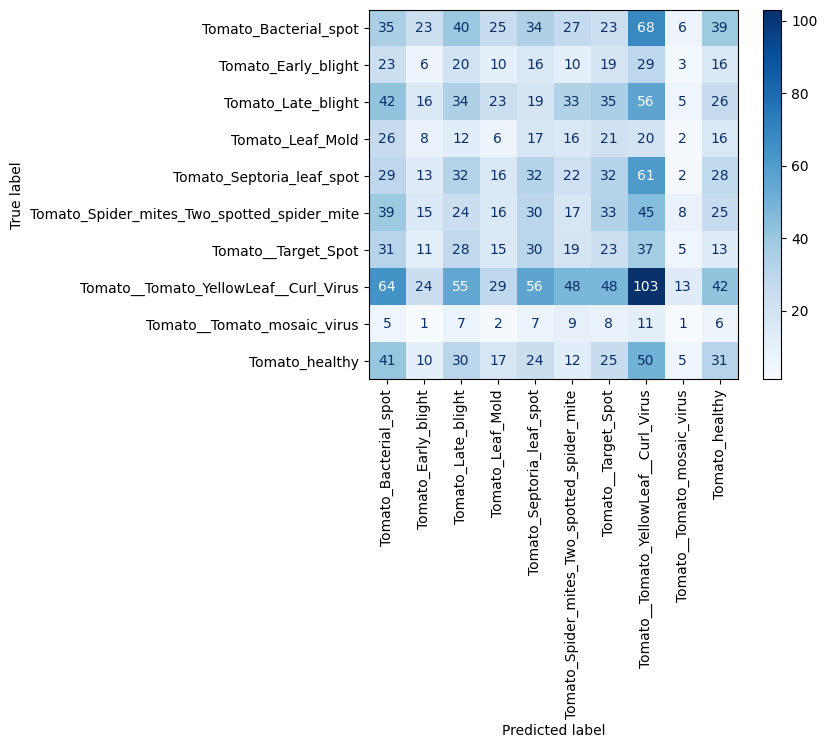

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on all validation data
val_data.reset()  # Reset the generator
preds = model.predict(val_data, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_data.classes
class_names = list(val_data.class_indices.keys())

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=90, cmap='Blues')


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files # Make sure to import the correct module here
import os
from PIL import Image
import hashlib

# Load the trained model
# Make sure this path is correct for your saved model file
model = load_model('/content/drive/MyDrive/tomato-disease/best_model_finetuned.h5')  # Corrected path

# Dataset path in Google Drive
dataset_path = '/content/drive/MyDrive/tomato-disease/PlantVillage/test'

# ---- Helper: Calculate SHA256 hash of image ----
def get_image_hash(image_path):
    with open(image_path, 'rb') as f:
        img_bytes = f.read()
        return hashlib.sha256(img_bytes).hexdigest()

# ---- Build hash set for dataset images ----
print("Indexing dataset...")
dataset_hashes = {}
for root, dirs, files_list in os.walk(dataset_path): # Renamed 'files' to 'files_list' to avoid conflict
    for name in files_list:
        full_path = os.path.join(root, name)
        try:
            img_hash = get_image_hash(full_path)
            dataset_hashes[img_hash] = full_path
        except:
            pass  # skip any unreadable files
print(f"Indexed {len(dataset_hashes)} dataset images.\n")


Indexing dataset...
Indexed 2415 dataset images.



In [8]:
class_names = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites",
    "Tomato___Target_Spot",
    "Tomato___Tomato_YellowLeaf__Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]


## 📸 Upload + Predict + Visualize

🔹 Purpose:

Uploads a tomato leaf image.

Checks if it's from the dataset using a hash.

Preprocesses the image for model input.

Predicts the disease using the trained model.

Maps and displays the predicted class label.

Shows the image with confidence and source info.

In [9]:
def predict_disease(img):
    try:
        img = img.resize((224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = float(np.max(prediction)) * 100

        return img, f"Disease Class: {predicted_class}", f"Confidence: {confidence:.2f}%"

    except Exception as e:
        print("Prediction Error:", str(e))
        return None, "Error", "Error"


In [10]:
import gradio as gr

demo = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="pil", label="Upload Tomato Leaf"),
    outputs=[
        gr.Image(label="Processed Image"),
        gr.Textbox(label="Prediction Result"),
        gr.Textbox(label="Confidence")
    ],
    title="🍅 Tomato Leaf Disease Classifier",
    description="Upload a tomato leaf image to detect disease using a deep learning model.",
    allow_flagging="never"
)

demo.launch()


/usr/local/lib/python3.11/dist-packages/gradio/interface.py:416: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://06821872f6bfe95533.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
